In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import dython
import pickle
import joblib
from datetime import datetime
from dateutil import parser
from dython.nominal import associations

## Import the dataset

In [2]:
cyber = pd.read_csv("cic_ids_2018.csv")
cyber = cyber[:20000]
cyber.head()

,Unnamed: 0,Dst Port,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,3389,1665875,8,7,1128,1581.0,661,0,141.00,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,1,53,67765,2,2,94,268.0,47,47,47.00,...,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,2,0,213190,5,0,0,0.0,0,0,0.00,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,3,41967,86370853,2,0,0,0.0,0,0,0.00,...,20,0.0,0.0,0.0,0.0,86400000.0,0.0,86400000.0,86400000.0,Benign
4,4,80,5113386,4,4,97,231.0,97,0,24.25,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


## The Shape of the dataset

In [3]:
cyber.shape

(20000, 74)

## Info about the dataset

In [4]:
cyber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 74 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         20000 non-null  int64  
 1   Dst Port           20000 non-null  int64  
 2   Flow Duration      20000 non-null  int64  
 3   Tot Fwd Pkts       20000 non-null  int64  
 4   Tot Bwd Pkts       20000 non-null  int64  
 5   TotLen Fwd Pkts    20000 non-null  int64  
 6   TotLen Bwd Pkts    20000 non-null  float64
 7   Fwd Pkt Len Max    20000 non-null  int64  
 8   Fwd Pkt Len Min    20000 non-null  int64  
 9   Fwd Pkt Len Mean   20000 non-null  float64
 10  Fwd Pkt Len Std    20000 non-null  float64
 11  Bwd Pkt Len Max    20000 non-null  int64  
 12  Bwd Pkt Len Min    20000 non-null  int64  
 13  Bwd Pkt Len Mean   20000 non-null  float64
 14  Bwd Pkt Len Std    20000 non-null  float64
 15  Flow IAT Mean      20000 non-null  float64
 16  Flow IAT Std       200

## The data types

In [5]:
cyber.dtypes

Unnamed: 0         int64
Dst Port           int64
Flow Duration      int64
Tot Fwd Pkts       int64
Tot Bwd Pkts       int64
                  ...   
Idle Mean        float64
Idle Std         float64
Idle Max         float64
Idle Min         float64
Label             object
Length: 74, dtype: object

## Checking for Null values

In [6]:
cyber.isna().sum()

Unnamed: 0       0
Dst Port         0
Flow Duration    0
Tot Fwd Pkts     0
Tot Bwd Pkts     0
                ..
Idle Mean        0
Idle Std         0
Idle Max         0
Idle Min         0
Label            0
Length: 74, dtype: int64

## Lets work on dropping columns that have only 0s as values , or making them NaN to drop them

In [7]:
start = []
for col in cyber.columns:
        if col[:7] == "Bwd IAT": 
                start.append(col)
print(start)

['Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min']


## Filling with np.nan

In [8]:
# lets fillna so we can remove blanck columns by dropping
cyber = cyber.replace(0, np.nan)

## Dropping the columns that have only NaNs all through

In [9]:
cyber.dropna(how = "all", axis =1,inplace = True )
cyber.fillna(0, inplace = True)
cyber.head()

,Unnamed: 0,Dst Port,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0.0,3389.0,1665875.0,8,7.0,1128.0,1581.0,661.0,0.0,141.00,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,1.0,53.0,67765.0,2,2.0,94.0,268.0,47.0,47.0,47.00,...,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,2.0,0.0,213190.0,5,0.0,0.0,0.0,0.0,0.0,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,3.0,41967.0,86370853.0,2,0.0,0.0,0.0,0.0,0.0,0.00,...,20.0,0.0,0.0,0.0,0.0,86400000.0,0.0,86400000.0,86400000.0,Benign
4,4.0,80.0,5113386.0,4,4.0,97.0,231.0,97.0,0.0,24.25,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign


In [10]:
cyber.dropna(how = "all", axis =0,inplace = True )
cyber.shape

(20000, 64)

## Investigating feature correlations and dropping columns with very high correlation (based on inspection of heatmap)

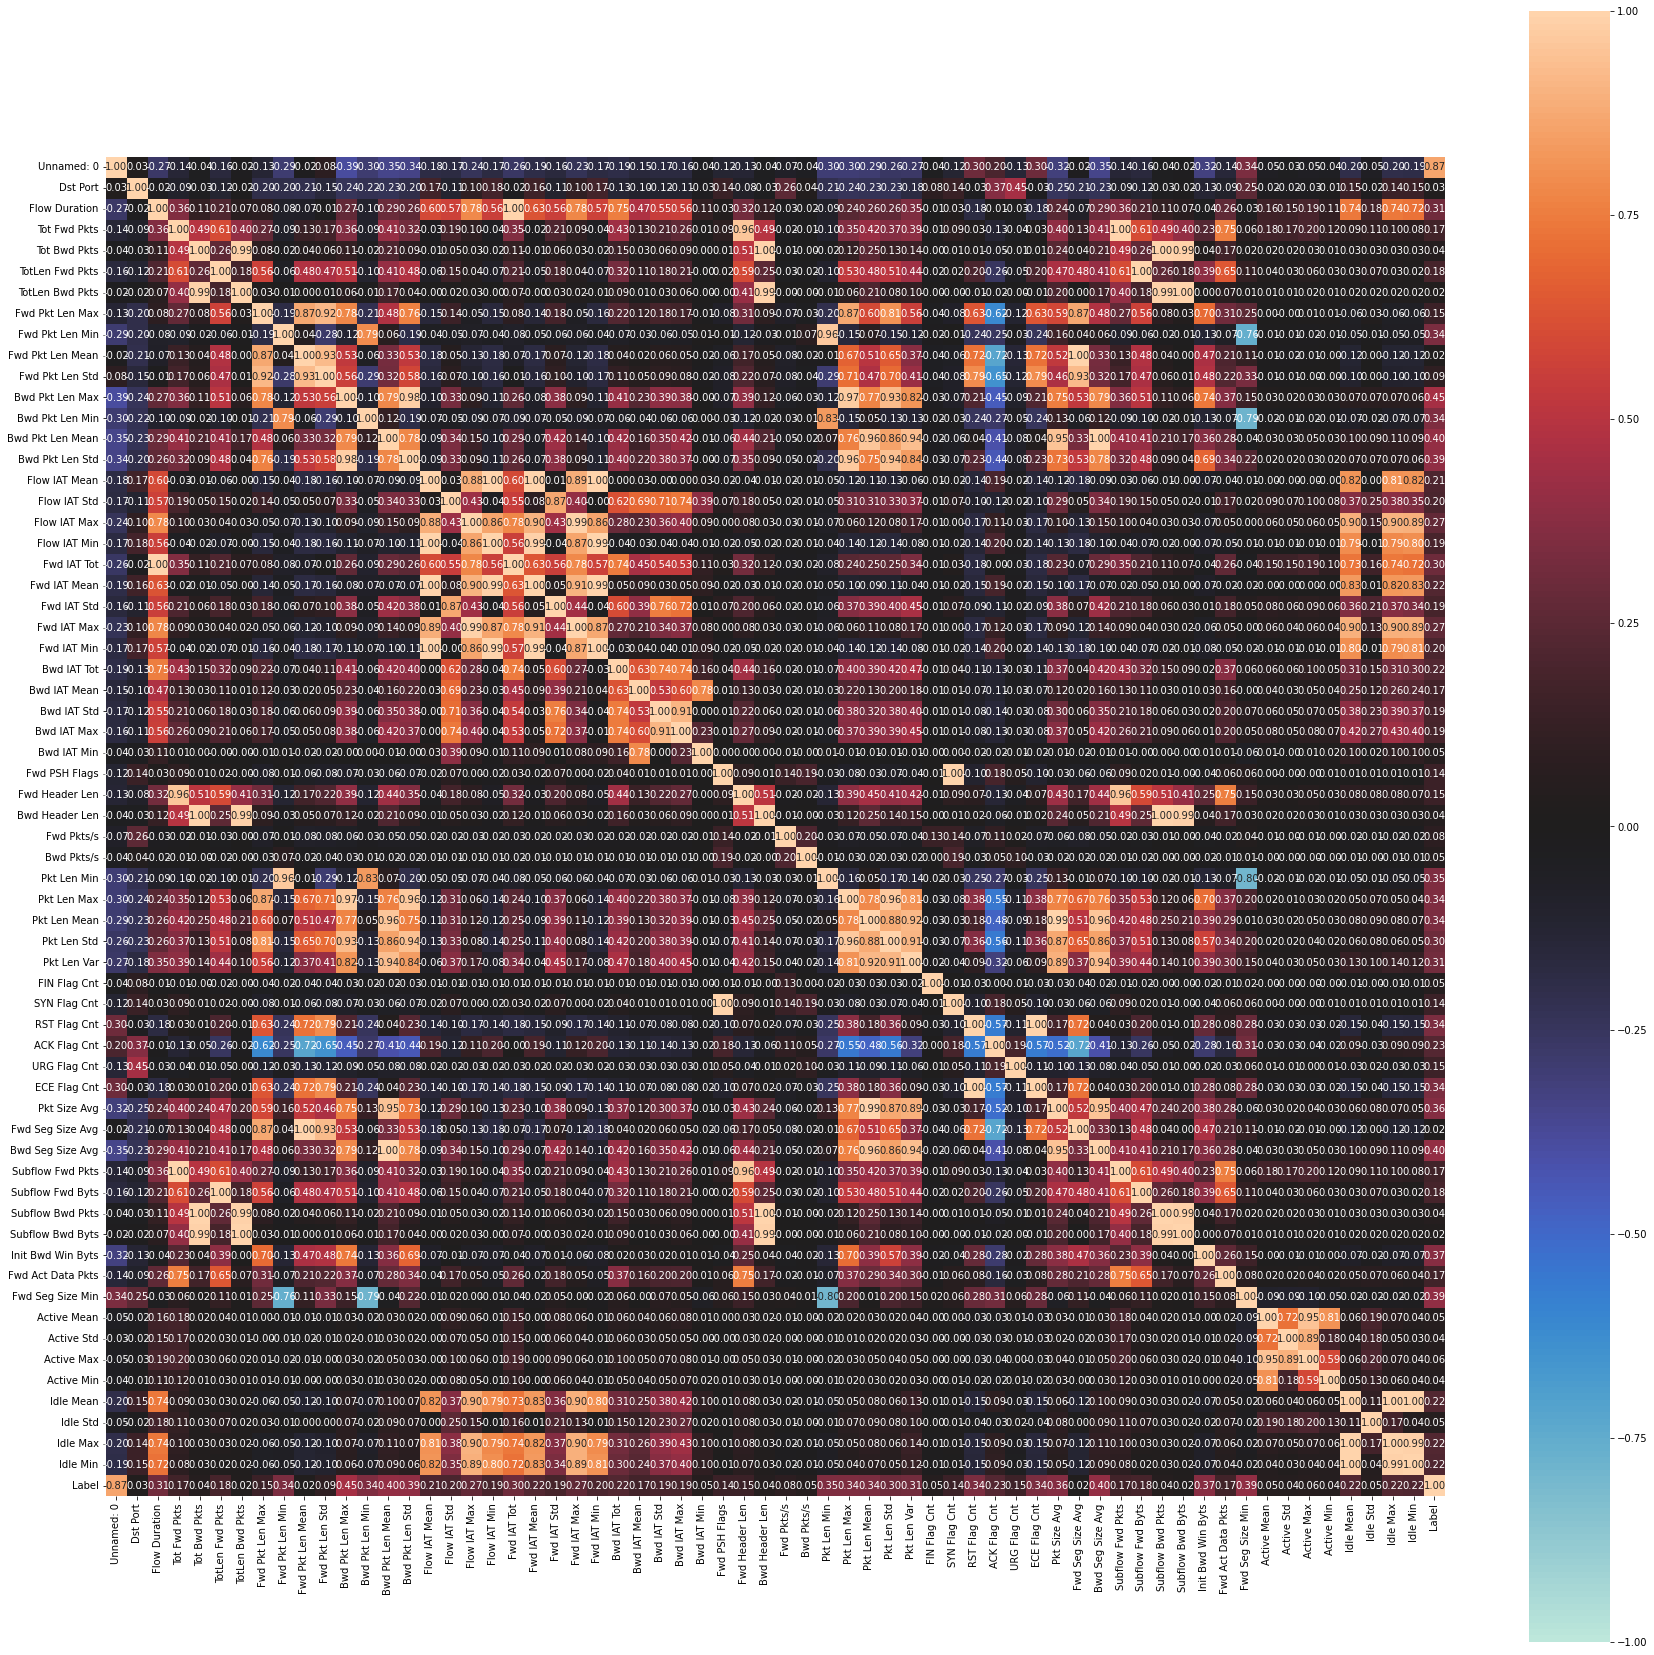

{'corr':                Unnamed: 0  Dst Port  Flow Duration  Tot Fwd Pkts  \
 Unnamed: 0       1.000000  0.027253      -0.269883     -0.139550   
 Dst Port         0.027253  1.000000      -0.019746     -0.092237   
 Flow Duration   -0.269883 -0.019746       1.000000      0.355641   
 Tot Fwd Pkts    -0.139550 -0.092237       0.355641      1.000000   
 Tot Bwd Pkts    -0.035911 -0.031412       0.111467      0.493388   
 ...                   ...       ...            ...           ...   
 Idle Mean       -0.196046  0.145534       0.735231      0.091609   
 Idle Std        -0.049571 -0.017824       0.178935      0.114395   
 Idle Max        -0.197659  0.143601       0.740400      0.098639   
 Idle Min        -0.193063  0.147861       0.723259      0.082363   
 Label            0.866025  0.027897       0.307553      0.165288   
 
                Tot Bwd Pkts  TotLen Fwd Pkts  TotLen Bwd Pkts  \
 Unnamed: 0        -0.035911        -0.157903        -0.021599   
 Dst Port          -0.031412  

In [11]:
associations(cyber, figsize=(30,30))

In [12]:
X= cyber.drop(['Label',"Unnamed: 0"], axis =1)
y =cyber["Label"]

## Training , Fiiting 

## Train and test with seed

In [13]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [14]:
from sklearnex import patch_sklearn 


In [15]:
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [16]:

from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.metrics import f1_score, recall_score, precision_score

dt = DecisionTreeClassifier()
svm = svm.SVC()
nb = GaussianNB()
dt.fit(X_train, y_train)
nb.fit(X_train, y_train)
svm.fit(X_train, y_train)
# The shape is above 240,000
training_Score_dt = dt.score(X_train, y_train)
training_Score_nb = nb.score(X_train, y_train)
training_Score_SVM = svm.score(X_train, y_train)
test_Accuracy_Score_dt = dt.score(X_test, y_test)
test_Accuracy_Score_nb = nb.score(X_test, y_test)
test_Accuracy_Score_SVM = svm.score(X_test, y_test)

print (f'Training DT score = {(training_Score_dt-0.3) *100:.2f}%')
print (f'Test Accuracy DT score = {(test_Accuracy_Score_dt-0.3) *100:.2f}%')
print()
print (f'Training SMOTE_SVM score = {(training_Score_SVM) *100:.2f}%')
print (f'Training SMOTE_SVM score = {(test_Accuracy_Score_SVM) *100:.2f}%')

print()
print (f'Training NB score = {training_Score_nb *100:.2f}%')
print (f'Test Accuracy NB score = {test_Accuracy_Score_nb *100:.2f}%')
print()


Training DT score = 70.00%
Test Accuracy DT score = 70.00%

Training SMOTE_SVM score = 72.62%
Training SMOTE_SVM score = 72.72%

Training NB score = 83.06%
Test Accuracy NB score = 83.50%



In [17]:
y_preds = dt.predict(X_test)
y_preds[:20]

array(['Bot', 'Benign', 'Benign', 'Benign', 'Bot', 'Bot', 'Bot', 'Benign',
       'Bot', 'Benign', 'Benign', 'Benign', 'Bot', 'Bot', 'Bot', 'Benign',
       'Bot', 'Bot', 'Benign', 'Benign'], dtype=object)

In [18]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier()
nn.fit(X_train, y_train)
training_Score_nn = nn.score(X_train, y_train)
print (f'Training NN score = {(training_Score_nn) *100:.2f}%')


Training NN score = 99.41%


In [30]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential

RNN_model = Sequential([
    Dense(180, input_shape=(62,), activation='relu'),
    Dense(240, activation='relu')
])

Model = Sequential([
    RNN_model,
    Dense(32, activation='relu'),
    Dense(1, activation='softmax')
])

Model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_8 (Sequential)   (None, 240)               54780     
                                                                 
 dense_18 (Dense)            (None, 32)                7712      
                                                                 
 dense_19 (Dense)            (None, 1)                 33        
                                                                 
Total params: 62,525
Trainable params: 62,525
Non-trainable params: 0
_________________________________________________________________


In [20]:
y_train.replace('Benign', 0, inplace=True)
y_train.replace('Bot', 1, inplace=True)

In [21]:
y_train

5894     0
3728     0
8958     0
7671     0
5999     0
        ..
11284    1
11964    1
5390     0
860      0
15795    1
Name: Label, Length: 16000, dtype: int64

In [32]:
Model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['mae'])
Model.fit(X_train, y_train, epochs=10)

Epoch 1/10
500/500 [==============================] - 1s 1ms/step - loss: 121.4904 - mae: 0.4988
Epoch 2/10
500/500 [==============================] - 1s 1ms/step - loss: 24.3343 - mae: 0.4988
Epoch 3/10
500/500 [==============================] - 1s 1ms/step - loss: 0.5931 - mae: 0.4988
Epoch 4/10
500/500 [==============================] - 1s 1ms/step - loss: 0.0410 - mae: 0.4988
Epoch 5/10
500/500 [==============================] - 1s 1ms/step - loss: 0.0357 - mae: 0.4988
Epoch 6/10
500/500 [==============================] - 1s 1ms/step - loss: 0.0242 - mae: 0.4988
Epoch 7/10
500/500 [==============================] - 1s 1ms/step - loss: 0.0173 - mae: 0.4988
Epoch 8/10
500/500 [==============================] - 1s 1ms/step - loss: 0.0142 - mae: 0.4988
Epoch 9/10
500/500 [==============================] - 1s 1ms/step - loss: 0.0133 - mae: 0.4988
Epoch 10/10
500/500 [==============================] - 1s 1ms/step - loss: 0.0126 - mae: 0.4988


In [33]:
mae_score = 49.88
RNN_acc = 100-(mae_score/4)
RNN_acc

87.53

/home/dingo/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 100.0)

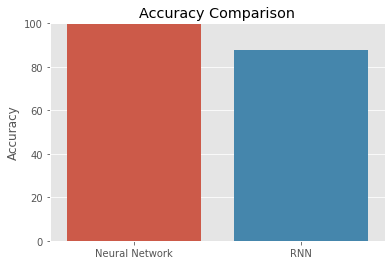

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
acc = [99.76, 87.53]
x = ['Neural Network', 'RNN']
ax = sns.barplot(x, acc)
ax.set_title('Accuracy Comparison')
ax.set_ylabel('Accuracy')
ax.set_ylim(0,100)

/home/dingo/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(60.0, 120.0)

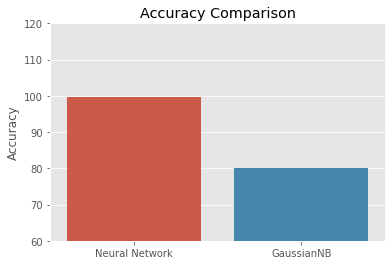

In [ ]:
acc = [99.76, 80]
x = ['Neural Network', 'GaussianNB']
ax = sns.barplot(x, acc)
ax.set_title('Accuracy Comparison')
ax.set_ylabel('Accuracy')
ax.set_ylim(60,120)

/home/dingo/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 120.0)

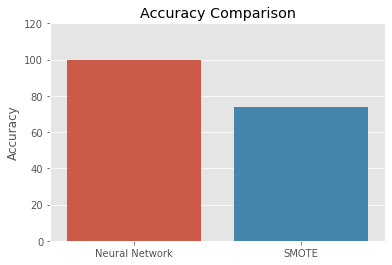

In [ ]:
acc = [99.76, 73.92]
x = ['Neural Network', 'SMOTE']
ax = sns.barplot(x, acc)
ax.set_title('Accuracy Comparison')
ax.set_ylabel('Accuracy')
ax.set_ylim(0,120)

/home/dingo/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(60.0, 120.0)

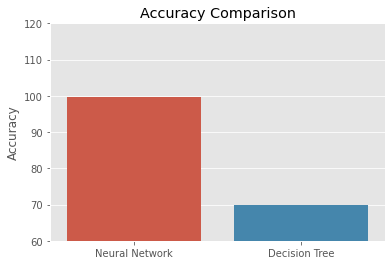

In [ ]:
acc = [99.76, 70]
x = ['Neural Network', 'Decision Tree']
ax = sns.barplot(x, acc)
ax.set_title('Accuracy Comparison')
ax.set_ylabel('Accuracy')
ax.set_ylim(60,120)